In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
files = [
    "/Users/timurchiks/Desktop/flight_price_predictor/data/raw/alaguw.csv",
    "/Users/timurchiks/Desktop/flight_price_predictor/data/raw/alanqz.csv",
    "/Users/timurchiks/Desktop/flight_price_predictor/data/raw/citnqz.csv",
    "/Users/timurchiks/Desktop/flight_price_predictor/data/raw/guwala.csv",
    "/Users/timurchiks/Desktop/flight_price_predictor/data/raw/nqzala.csv",
    "/Users/timurchiks/Desktop/flight_price_predictor/data/raw/nqzcit.csv"
]

df = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)
df

,Price,From,To,curr_date,departure_date,arrival_date,is_holiday,is_weekends,time_interval,avialine,duration
0,37864,Алматы,Атырау,2024-12-16,2024-12-19 20:55,2024-12-20 00:15,False,False,20:55-00:15,Air Astana,200
1,37864,Алматы,Атырау,2024-12-16,2024-12-19 06:45,2024-12-19 10:00,False,False,06:45-10:00,Air Astana,195
2,37864,Алматы,Атырау,2024-12-16,2024-12-22 06:45,2024-12-22 10:00,False,True,06:45-10:00,Air Astana,195
3,28356,Алматы,Атырау,2024-12-16,2024-12-23 06:45,2024-12-23 10:00,False,False,06:45-10:00,Air Astana,195
4,29220,Алматы,Атырау,2024-12-16,2024-12-23 09:20,2024-12-23 12:30,False,False,09:20-12:30,SCAT,190
...,...,...,...,...,...,...,...,...,...,...,...
2276,19146,Астана,Шымкент,2024-12-15,2025-02-28 23:20,2025-03-01 01:00,False,False,23:20-01:00,SCAT,100
2277,15664,Астана,Шымкент,2024-12-15,2025-02-28 08:10,2025-02-28 10:00,False,False,08:10-10:00,SCAT,110
2278,18511,Астана,Шымкент,2024-12-15,2025-02-28 17:35,2025-02-28 19:30,False,False,17:35-19:30,FlyArystan,115
2279,19146,Астана,Шымкент,2024-12-15,2025-02-28 17:40,2025-02-28 19:30,False,False,17:40-19:30,SCAT,110


In [3]:
print(df.shape, '\n')

print(df.head(), '\n')

print(df.info(), '\n')

print(df.describe())

(2281, 11) 

   Price    From      To   curr_date    departure_date      arrival_date  \
0  37864  Алматы  Атырау  2024-12-16  2024-12-19 20:55  2024-12-20 00:15   
1  37864  Алматы  Атырау  2024-12-16  2024-12-19 06:45  2024-12-19 10:00   
2  37864  Алматы  Атырау  2024-12-16  2024-12-22 06:45  2024-12-22 10:00   
3  28356  Алматы  Атырау  2024-12-16  2024-12-23 06:45  2024-12-23 10:00   
4  29220  Алматы  Атырау  2024-12-16  2024-12-23 09:20  2024-12-23 12:30   

   is_holiday  is_weekends time_interval    avialine  duration  
0       False        False   20:55-00:15  Air Astana       200  
1       False        False   06:45-10:00  Air Astana       195  
2       False         True   06:45-10:00  Air Astana       195  
3       False        False   06:45-10:00  Air Astana       195  
4       False        False   09:20-12:30        SCAT       190   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2281 entries, 0 to 2280
Data columns (total 11 columns):
 #   Column          Non-Null C

In [4]:
print(df.isna().sum())

Price             0
From              0
To                0
curr_date         0
departure_date    0
arrival_date      0
is_holiday        0
is_weekends       0
time_interval     0
avialine          0
duration          0
dtype: int64


In [12]:
df.duplicated().sum()

np.int64(49)

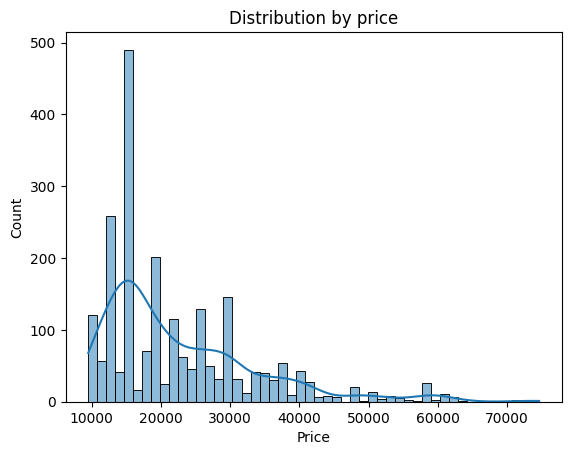

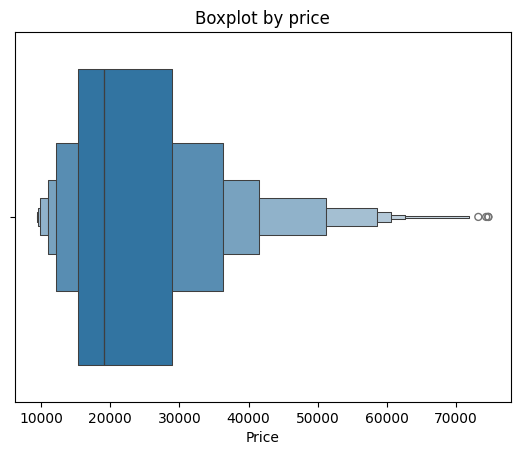

In [6]:
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution by price')
plt.show()

sns.boxenplot(x=df['Price'])
plt.title('Boxplot by price')
plt.show()

In [7]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
df.shape

(2196, 11)

['Air Astana' 'SCAT' 'FlyArystan' 'Qazaq Air']


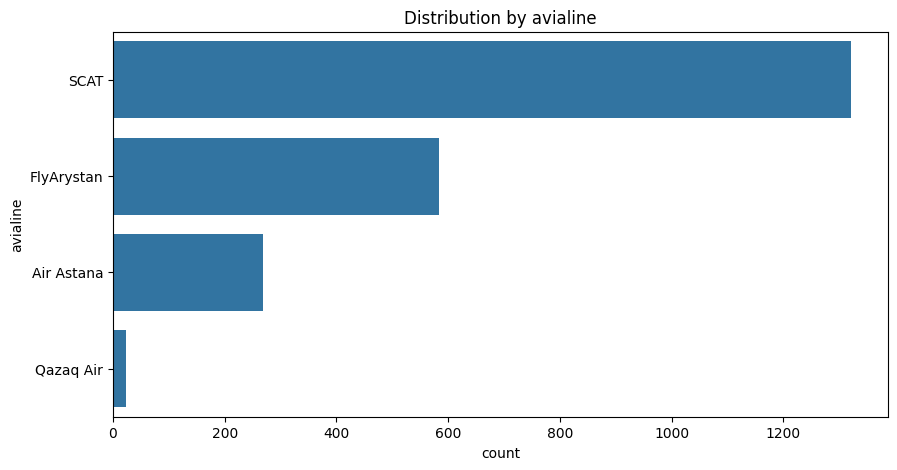

In [8]:
print(df['avialine'].unique())

plt.figure(figsize=(10, 5))
sns.countplot(y=df['avialine'], order=df['avialine'].value_counts().index)
plt.title("Distribution by avialine")
plt.show()

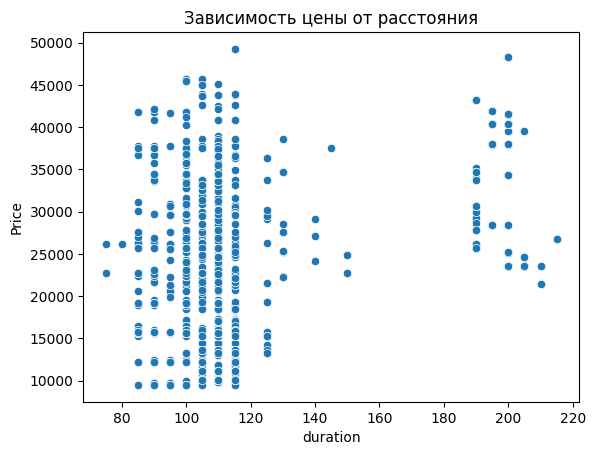

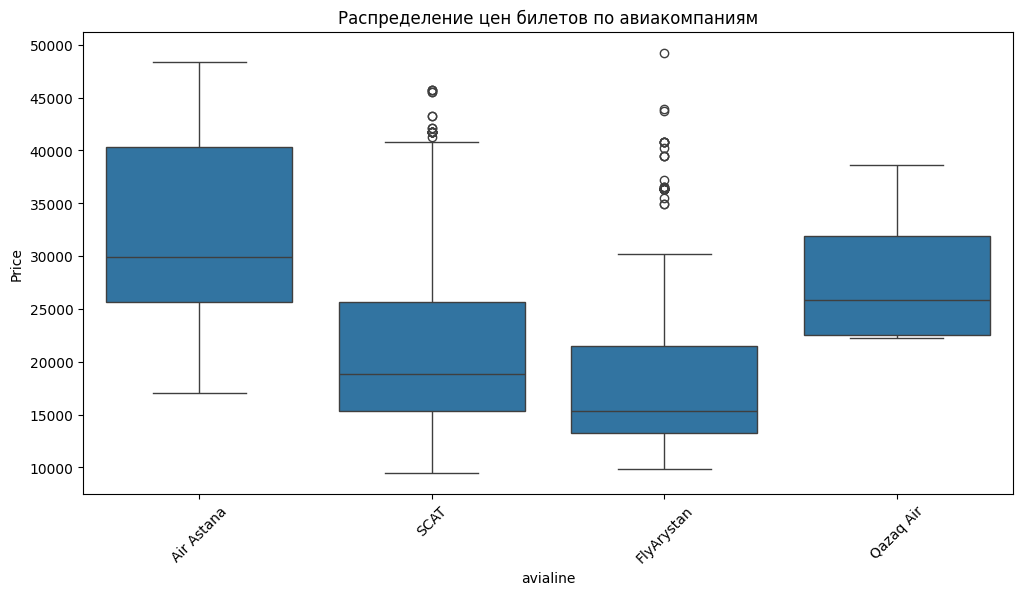

In [10]:
sns.scatterplot(x=df["duration"], y=df["Price"])
plt.title("Зависимость цены от расстояния")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df["avialine"], y=df["Price"])
plt.xticks(rotation=45)
plt.title("Распределение цен билетов по авиакомпаниям")
plt.show()

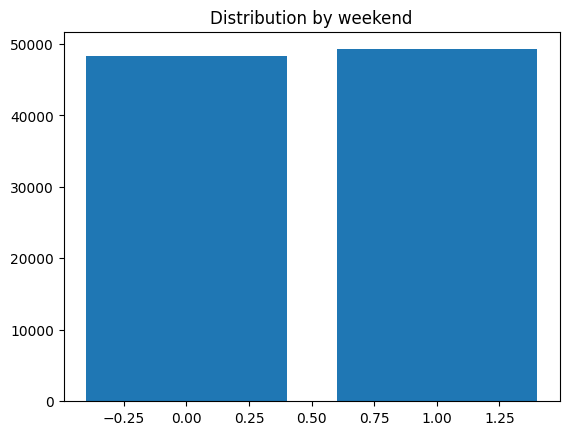

In [18]:
plt.bar(df['is_weekends'], df['Price'])
plt.title("Distribution by weekend")
plt.show()

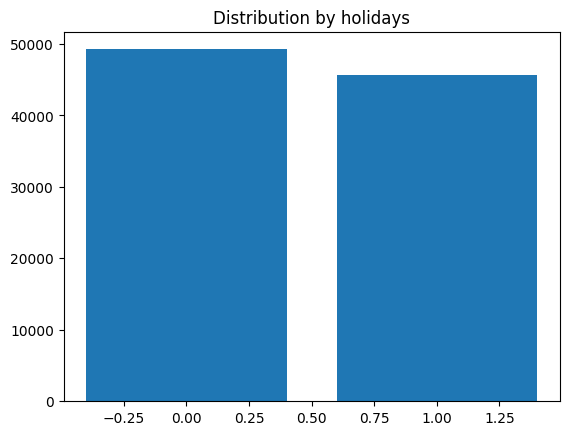

In [19]:
plt.bar(df['is_holiday'], df['Price'])
plt.title("Distribution by holidays")
plt.show()

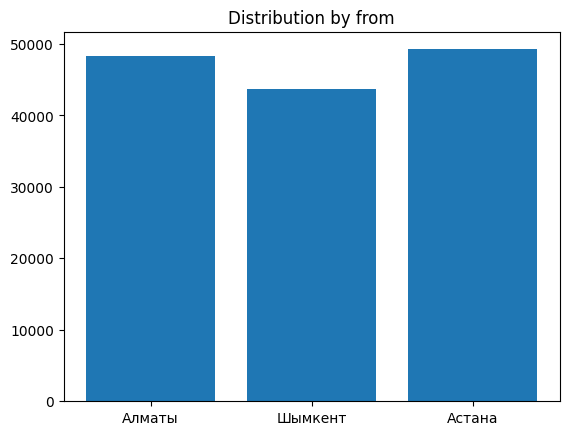

In [20]:
plt.bar(df['From'], df['Price'])
plt.title("Distribution by from")
plt.show()

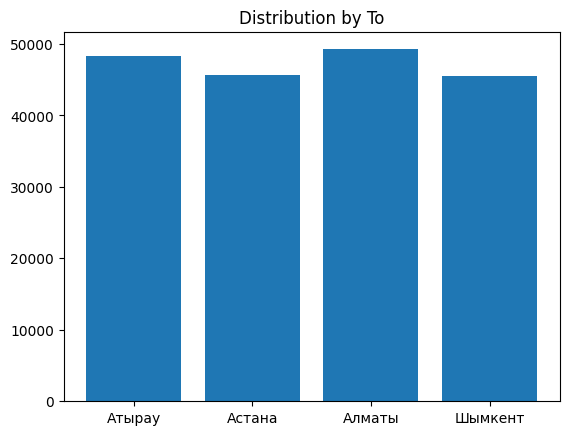

In [21]:
plt.bar(df['To'], df['Price'])
plt.title("Distribution by To")
plt.show()

In [11]:
df.to_csv("/Users/timurchiks/Desktop/flight_price_predictor/data/processed/raw_data.csv", index=False)